# Introduction To Casuality

## 연관성(Association)이 인과관계(Causation)가 될 때

직관적으로 봤을때 연관성은 인과관계와 다르다

- 예시)
    1. 학생들에게 태블릿 PC를 제공하는 학교 A 와 제공하지 않는 학교 B가 있다.
    2. A학교가 B학교보다 좋은 성적을 가진다면, A학교가 더 부유할 것이다.
    3. 부유한 환경은 태블릿을 제공하지 않더라도 평균보다 더 잘 할 수 있을 것.
    4. 따라서 태블릿의 제공하는 것이 학업 성취도를 높일 것이라 결론지을 수는 없다.
    5. 단지 제공되는 태블릿이 높은 학업 성과와 관련이 있다고 말할 수 있다.(연관)

In [1]:
import pandas as pd
import numpy as np
from scipy.special import expit
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(123)

In [6]:
n = 100
# tution : 평균이 1000, 표준편차 300을 가지는 정규분포에서 n개 추출
tuition = np.random.normal(1000,300,n).round() 
# tablet : 이항분포로 성공, 실패 결과 생성
tablet = np.random.binomial(1, expit((tuition-tuition.mean()) / tuition.std())).astype(bool)

score = np.random.normal(200 - 50 * tablet + 0.7 * tuition, 200)
score = (score - score.min()) / score.max()
score *= 1000

data = pd.DataFrame(dict(score=score, Tuition=tuition, Tablet=tablet))

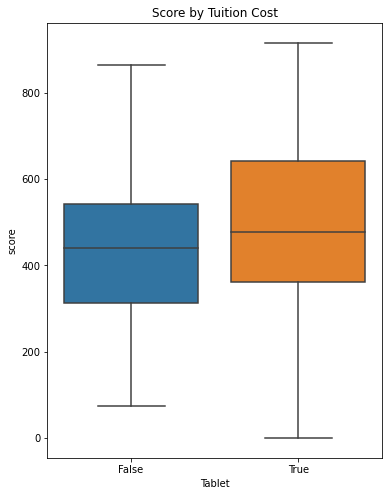

In [7]:
plt.figure(figsize=(6,8))
sns.boxplot(y="score", x="Tablet", data = data).set_title('Score by Tuition Cost')
plt.show()

$T_i$는 unit i (실험대상 i)에 대한 Treatment (처치) 여부를 나타냅니다.

$
T_i=\begin{cases}
1 \ \text{: 실험대상 i가 Treatment를 받은 경우}\\
0 \ \text{: 실험대상 i가 Treatment를 받지 않은 경우}\\
\end{cases}
$

위의 경우에서 treatment는 학생들에게 태블릿을 제공한 것에 해당한다.($T$ 대신 $D$로 표시하는 경우도 있다)

unit i에 대한 결과변수(Outcome Variable)을 $Y_i$로 정의한다.

결과(Outcome)은 우리가 관심있는 변수이다. 

우리는 인과추론에서 Treatment가 Outcome에 영향을 미치는지 궁금해할 것이다.

하지만 인과추론의 근본적인 문제는 Treatment가 있든 없든 같은 실험 대상에 대해 동시에 관찰할 수 없다는 점이다.

이 문제를 해결하기 위해 잠재적 결과(Potential Outcomes)라는 개념이 등장한다.

Potential Outcomes는 실제로 일어나지 않았으나, 발생할 수 있는 결과를 의미한다.

대신 Treatment를 받은 경우, 무슨일이 일어났을지를 나타낸다. 

이렇게 일어난 잠재적 결과를 우리는 사실(factual)이라고 부르고, 일어나지 않은 결과를 반사실(counterfactual)이라고 칭한다.

$Y_{0i}$ : 실험대상 i가 Treatment를 받지 않은 잠재적 결과를 의미 

$Y_{1i}$ : **같은 실험대상 i**가 Treatment를 받은 잠재적 결과를 의미

잠재적 결과를 함수 $Y_i(t)$로 표기하는 경우도 있다. 
$Y_{0i}$가 $Y_i(0)$로 표기될 수 있고 $Y_{1i}$는 $Y_i(1)$으로 표기될 수 있다.

- 위의 예제에서 $Y_{1i}$는 태블릿이 있는 교실에 있는 경우 학생 i에 대한 학업 성취도를 나타낸다. 
    만약 학생 i가 태블릿을 받았다면, $Y_{1i}$를 관찰할 수 있다. 만약 태블릿을 받지 못한 경우는 $Y_{0i}$를 관찰 할 수 있고,
    태블릿을 받지 못한 경우, $Y_{1i}$가 여전히 정의되어 있지만 우리가 관측할 수 없다. 이 경우가 반사실적 잠재적 결과(counterfactual potential outcome)이다.
    
potential outcomes을 통해, 개별 처치 효과(ITE, Individual Treatment, Effect)를 정의할 수 있다.

$ITE = $Y_{1i} - Y_{0i}$

물론, 인과추론의 근본적인 문제로 인해 잠재적 결과 중 하나만 관찰할 수 있다. 그렇기 때문에 ITE를 알 수 없다. 

그래서 당분간은 ITE를 추정하는 것 대신, 추정하기 더 쉬운 **평균 처치 효과 (ATE, Average Treatment Effect)**에 대해 알아보자

$ATE = E[Y_1 - Y_0]$

`E[...]` 는 기댓값. 

조금 더 추정하기 쉬운 값은 **처치받은 그룹에 대한 평균 처치 효과(ATET/ATT, average treatment effect on the treated)** 이다

$ATT = E[Y_1 - Y_0 | T=1]$

위의 사례에서 본 것 처럼, 두 가지 잠재적 결과를 모두 볼 수 없다는 것을 확인했다. 

하지만, counterfactual도 볼 수 있다고 가정해보자. 

잠재적 대안의 결과를 알 수 있다고 가정하고, 4개의 학교 학생들에게 태블릿 제공 여부와 연간 학업 시험 점수를 알 수 있다고 해보자.

여기서 태블릿은 Treatment, 학생에게 태블릿을 제공하는 경우는 $T=1$이고, $Y$는 학업 성취에 대한 시험 점수가 된다

In [9]:
pd.DataFrame(dict(
    i= [1,2,3,4],
    y0=[500,600,800,700],
    y1=[450,600,600,750],
    t= [0,0,1,1],
    y= [500,600,600,750],
    te=[-50,0,-200,50],
))

,i,y0,y1,t,y,te
0,1,500,450,0,500,-50
1,2,600,600,0,600,0
2,3,800,600,1,600,-200
3,4,700,750,1,750,50


$ATE$(평균처지효과)는 마지막 컬럼에 대한 평균 -> 개별 처치효과(ITE)에 대한 평균

$ATE$ = (-50 + 0 - 200 + 50) / 4 = -50

$ATE$의 값은 -50이므로, 태블릿이 학생들의 학업 성취도를 평균적으로 50점 감소시켰음을 의미한다.

여기서, $ATT$(처치받은 그룹에 대한 평균처치효과)는 $T$=1일 때 마지막 컬럼의 평균이다.

$ATT$ = (-200 + 50) / 2 = -75

태블릿을 받은 학교는 태블릿이 학생들의 학업 성취도를 평균적으로 75점 감소시켰음을 의미한다.

물론 우리는 해당 결과를 알 수 없다(counterfactuals) -> 실제로는 동시에 y0과 y1을 알 수 없기 때문에

실제로 보게 될 데이터는 아래와 같다

In [10]:
pd.DataFrame(dict(
    i= [1,2,3,4],
    y0=[500,600,np.nan,np.nan],
    y1=[np.nan,np.nan,600,750],
    t= [0,0,1,1],
    y= [500,600,600,750],
    te=[np.nan,np.nan,np.nan,np.nan],
))

,i,y0,y1,t,y,te
0,1,500.0,NaN,0,500,NaN
1,2,600.0,NaN,0,600,NaN
2,3,NaN,600.0,1,600,NaN
3,4,NaN,750.0,1,750,NaN


## Bias(편향)

Bias는 연관성을 인과관계와 다르게 만든다.

연관성이 인과관계가 아닌 이유를 수식으로 표현하면 아래와 같다.

연관성은 $E[Y|T=1] - E[Y|T=0]$로 측정된다. 이는 태블릿이 있는 학교의 평균 시험 점수에서 태블릿이 없는 학교의 평균 시험 점수를 뺀 값. 

반면 인과관계는 $E[Y_1 - Y_0]$로 측정한다.


### 연관성을 측정하고 관찰된 결과가 어떻게 Potential outcomes로 관련되는지 알아보자

처치를 받은 경우 관찰된 결과는 $Y_1$, 처치를 받지 않은 경우 관찰된 결과는 $Y_0$이다 

$
E[Y|T=1] - E[Y|T=0] = E[Y_1|T=1] - E[Y_0|T=0]
$

이제, $E[Y_0|T=1]$를 더하고 뺀다. 

$
E[Y|T=1] - E[Y|T=0] = E[Y_1|T=1] - E[Y_0|T=0] + E[Y_0|T=1] - E[Y_0|T=1]
$

이 부분은 counterfactual outcome에 대한 부분으로 처치를 받지 않았다면 처치의 결과가 어떠했을 것인지를 의미.

수식을 재정리하면 아래와 같다.

$
E[Y|T=1] - E[Y|T=0] = \underbrace{E[Y_1 - Y_0|T=1]}_{ATT} + \underbrace{\{ E[Y_0|T=1] - E[Y_0|T=0] \}}_{BIAS}
$


정리한 식을 살펴보면 연관성은 처치에 대한 처치효과(ATT)에 편향(Bias)를 더한것과 같다.

Bias는 실험군과 대조군이 처치를 받지 않은 경우, 처치 전에 실험군과 대조군이 어떻게 다른지를 나타냄.

위의 데이터 예시에서 보면 $E[Y_0|T=0] < E[Y_0|T=1]$ 으로 보았을 때, 태블릿 제공 여부와 무관하게 학생들에게 처치를 받은 학교가 그렇지 않은 학교보다 낫다고 생각할 수 있다.

하지만 태블릿 제공여부 이외에도 다른 변수들이 존재할 것이다.(ex.수강료, 위치, 교사 등등)

**태블릿 제공이 학업 성적 향상에 도움이 된다고 이야기하기 위해서는 태블릿이 있는 학교와 없는 학교가 평균적으로 서로 비슷해야 비교 가능하다.**

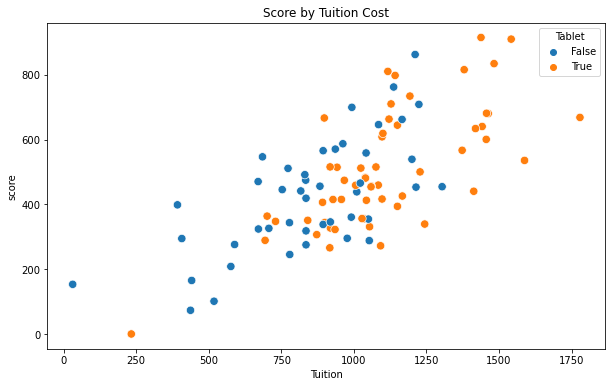

In [12]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Tuition", y="score", hue="Tablet", data=data, s=70).set_title('Score by Tuition Cost')
plt.show()

연관성을 인과관계와 같게 만들어주기 위해서는 $E[Y_0|T=0] = E[Y_0|T=1]$을 만족해야한다.

- 이 식은 실험군과 대조군이 비교 가능하다는 것을 의미
- 실험군이 처치 받지 않았을 때 $Y_0$을 관찰할 수 있다면, 그 결과는 처치 받지 않은 것과 같다.
- bias가 0이 되어 사라진다

$
ATT = (E[Y|T=1] - E[Y|T=0] = E[Y_1 - Y_0|T=1])
$
에서도 처치받은 그룹과 처치받지 않은 그룹이 Treatment에서만 다른 경우, 

$E[Y_0|T=0] = E[Y_0|T=1]$이고 처치를 받은 그룹에 대한 인과 효과는 처치를 받지 않은 그룹과 같다(두 그룹이 매우 유사하기에)



\
\
$
\begin{align}
E[Y_1 - Y_0|T=1] &= E[Y_1|T=1] - E[Y_0|T=1] \\
&= E[Y_1|T=1] - E[Y_0|T=0] \\
&= E[Y|T=1] - E[Y|T=0]
\end{align}
$
\
\
위와 같이 비교가능한 그룹일 경우, 두 집단의 평균차이가 인과효과가 된다.
\
\
$
E[Y|T=1] - E[Y|T=0] = ATT
$
\
\
위에서 처치된 그룹과 처치괴지 않은 그룹이 Treatment에서만 다른 경우 $E[Y_1|T=1] - E[Y_1|T=0]$로도 표현 가능.

이제 실험군과 대조군이 모두 Treatment에서 유사하게 반응하는지 확인해야합니다.

처치 전 교환가능(exchangable, 비교가능)하며, 처치 후에도 실험군과 대조군이 교환 가능.

해당 경우는 다음과 같이 표현 ->  $E[Y_1 - Y_0|T=1]=E[Y_1 - Y_0|T=0]$ 및 $E[Y|T=1] - E[Y|T=0] = ATT = ATE$

아래 그림을 봐보자

![img](./data/img/intro/anatomy1.png)

위 그림에서 파란색점은 처치받지 않은 그룹, 빨간색 점은 처치 받은 그룹이다.

두 그룹간의 결과 차이는 2가지 원인을 가진다.
- 처치효과. 시험 점수의 증가는 학생들에게 태블릿을 제공함으로써 발생
- 시험 점수의 일부 차이는 더 나은 교육을 위한 등록금 때문일 수 있다.이 경우, 처치를 받은 학생들의 수업료가 훨씬 비싸기 때문에 실험군과 대조군에서 차이가 발생함. 즉, 처치 받은 그룹과 받지 않은 그룹의 차이는 Treatment 자체가 아니게 된다.

ITE는 동일한 실험 대상에 대한 결과와 다른 대안의 처치를 받았을 경우, 얻을 수 있는 이론적 결과간의 차이이다.

실제 처치 효과는 아래 왼쪽 그림과 같이 잠재적 결과를 관찰할 수 있는 신과 같은 힘이 있어야만 얻을 수 있다. 이는 반사실 결과(counterfactual outcomes)이며 밝은 색으로 표시된다

![img](./data/img/intro/anatomy2.png)


오른쪽 그래프에서는 bias를 나타냈다. 실험에 참가한 모든 대상이 처치를 받지 않는다면, 편향이 생긴다. 

이 경우, $T_0$ 잠재적 결과만 남게된다. 그런 다음 처치된 그룹과 처치되지 않은 그룹이 어떻게 다른지 확인.

만약 그렇다면, Treatment 이외의 다른 요인이 실험군과 대조군을 다르게 만드는 원인이 될 것 -> 이것이 bias이며, Treatment에 대한 실질적인 효과를 실제 치료 효과를 가리게 된다.

bias가 없는 가상의 상황과 대조해보자.

태블릿이 학교에 무작위로 할당되었다고 가정 -> 부유한 학교와 가난한 학교가 태블릿을 받을 기회는 동일하다. 즉, Treatment인 태블릿 제공 여부는 등록금 전반에 걸쳐서 고르게 분배될 것.

![img](./data/img/intro/anatomy3.png)


위 경우에서는 처치를 받은 그룹과 받지 않은 그룹의 차이는 평균 인과 효과에 해당

그 이유는 Treatment이외에 처치받은 그룹과 받지않은 그룹 사이 차이의 다른 원인이 없기 때문.

이런 경우 bias가 없다

![img](./data/img/intro/anatomy4.png)

$Y_0$만 관찰하도록 모든 실험 대상이 처치 받지 않도록 설계하면, 실험군과 대조군 간의 차이가 존재하지 않을 것이다.

이러한 부분이 인과추론에 있어서 정말 힘든 부분이다.

Bias를 제거하고 실험군과 대조군을 비교 가능하게 하는 방법을 찾아서, 모든 차이가 평균적인 처리 효과(ATE)만으로 추정할 수 있게끔 해야한다.
